# Produce dirty image and psf, from a (rascil) FITS image, and an instrumental setup (baselines, frequencies, etc.)

In [11]:
from visibilities import *
from images import *
import matplotlib.pyplot as plt
plt.set_loglevel("critical")
cmap='viridis'

### Define baseline configuration, integration time, hour angle interval of observations, phase centre, etc.

In [30]:
phasecentre = SkyCoord(ra=+56.0 * u.deg, dec=-30.0 * u.deg, frame='icrs', equinox='J2000')
ha_interval=(-2,2)
vt = generate_visibilities(phasecentre,ha_interval,tel="MEERKAT")

create_named_configuration: MEERKAT
	(<Quantity 5109360.08350152 m>, <Quantity 2006852.56658911 m>, <Quantity -3238948.21751511 m>)
	GeodeticLocation(lon=<Longitude 21.44388889 deg>, lat=<Latitude -30.7110565 deg>, height=<Quantity 1086.6 m>)
create_configuration_from_file: 64 antennas/stations
create_visibility: created 120 times


create_visibility: 249600 rows, 0.013 GB


### Plot uv coverage


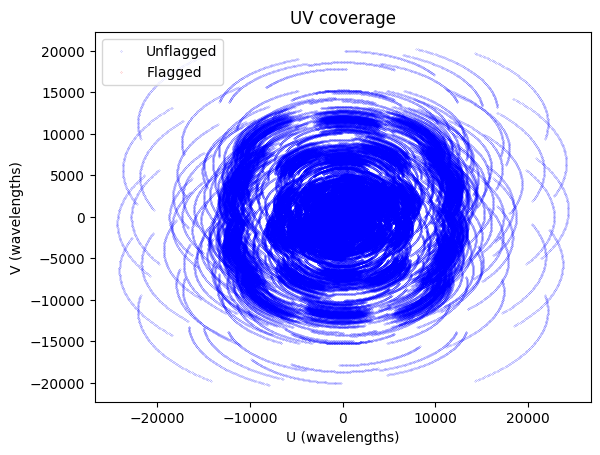

In [31]:
plot_uvcoverage([vt])

### Fill visibilities amplitude from (Fourier plane values) of image in FITS file. Cell size corresponds to the (advised) pixel angular size in radians. Uses Nifty gridder.

In [32]:
vt, cell_size, im = visibilities_from_image(vt,'data/Meerkat_Galactic_center_512_ext.fits',return_cellsize=True,return_image=True)
vt, cell_size, #im = visibilities_from_image(vt,'data/toto_ext.fits',return_cellsize=True,return_image=True)

advise_wide_field: (max_wavelength) Maximum wavelength 0.300 (meters)
advise_wide_field: (min_wavelength) Minimum wavelength 0.300 (meters)
advise_wide_field: (maximum_baseline) Maximum baseline 24331.5 (wavelengths)
advise_wide_field: (maximum_w) Maximum w 10597.6 (wavelengths)
advise_wide_field: (diameter) Station/dish diameter 13.5 (meters)
advise_wide_field: (primary_beam_fov) Primary beam 0.0222 (rad) 1.27 (deg) 4.58e+03 (asec)
advise_wide_field: (image_fov) Image field of view 0.0666 (rad) 3.82 (deg) 1.37e+04 (asec)
advise_wide_field: (synthesized_beam) Synthesized beam 4.11e-05 (rad) 0.00235 (deg) 8.48 (asec)
advise_wide_field: (cellsize) Cellsize 1.03e-05 (rad) 0.000589 (deg) 2.12 (asec)
advice_wide_field: (npixels) Npixels per side = 6484
advice_wide_field: (npixels2) Npixels (power of 2) per side = 8192
advice_wide_field: (npixels23) Npixels (power of 2, 3) per side = 8192
advice_wide_field: (npixels_min) Npixels (power of 2, 3, 4, 5) per side = 6561

advice_wide_field: (w_sa

(<xarray.Visibility>
 Dimensions:            (time: 120, baselines: 2080, frequency: 1,
                         polarisation: 1, spatial: 3)
 Coordinates:
   * time               (time) float64 4.453e+09 4.453e+09 ... 4.453e+09
   * baselines          (baselines) object MultiIndex
   * antenna1           (baselines) int64 0 0 0 0 0 0 0 ... 60 61 61 61 62 62 63
   * antenna2           (baselines) int64 0 1 2 3 4 5 6 ... 63 61 62 63 62 63 63
   * frequency          (frequency) float64 1e+09
   * polarisation       (polarisation) <U1 'I'
   * spatial            (spatial) <U1 'u' 'v' 'w'
 Data variables:
     integration_time   (time) float64 120.0 120.0 120.0 ... 120.0 120.0 120.0
     datetime           (time) datetime64[ns] 2000-01-01T17:37:07.745701955 .....
     vis                (time, baselines, frequency, polarisation) complex128 ...
     weight             (time, baselines, frequency, polarisation) float64 0.0...
     flags              (time, baselines, frequency, polarisation)

### Plot visibility amplitudes as a function of uv radius

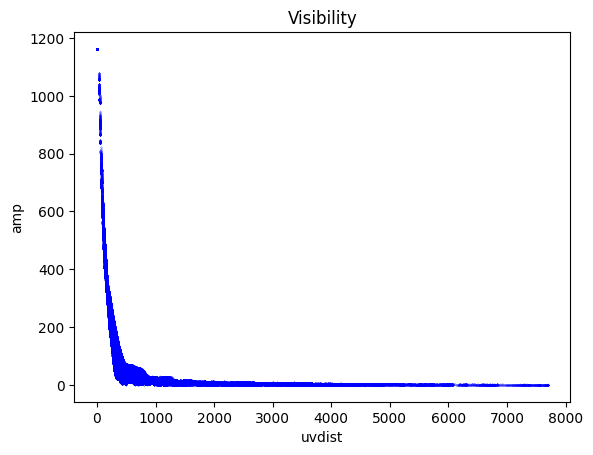

In [33]:
plot_visibility([vt])

### Create empty (rascil) image from visibility metadata. Then predict dirty and psf images using nifty gridder (adjoint)

In [34]:
dirty, psf = dirty_psf_from_visibilities(vt,cell_size,npix=512)

create_image_from_visibility: Parsing parameters to get definition of WCS
create_image_from_visibility: Defining single channel Image at <SkyCoord (ICRS): (ra, dec) in deg
    (56., -30.)>, starting frequency 1000000000.0 Hz, and bandwidth 1000000.0 Hz
create_image_from_visibility: uvmax = 24331.536075 wavelengths
create_image_from_visibility: Critical cellsize = 0.000021 radians, 0.001177 degrees
create_image_from_visibility: Cellsize = 1.02747e-05 radians, 0.000588699 degrees
create_image_from_visibility: image shape is (1, 1, 512, 512)


### Visualize original image, dirty image and psf

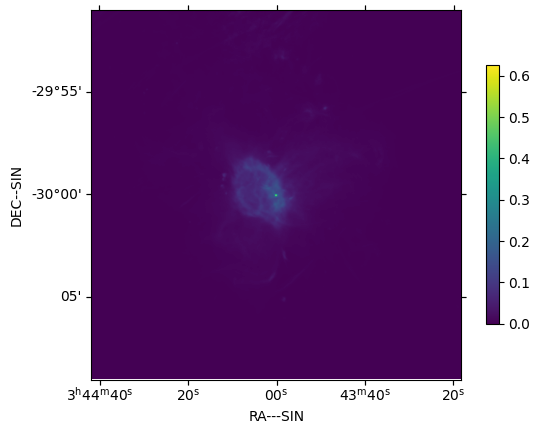

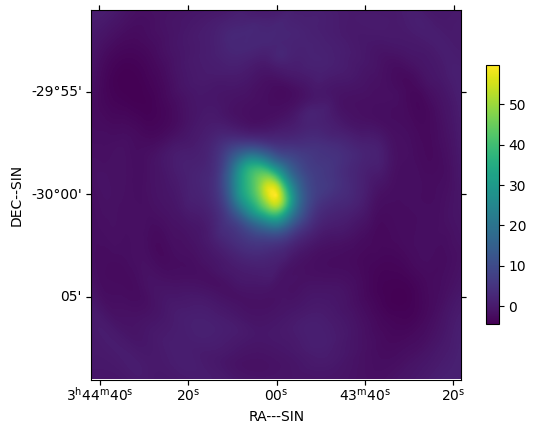

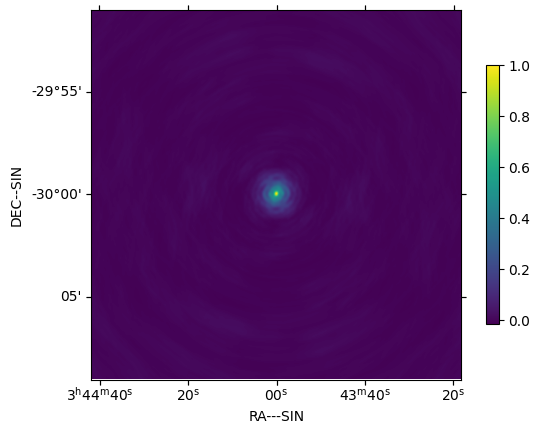

In [35]:
pl=show_image(im,cm=cmap)
pl=show_image(dirty,cm=cmap)
pl=show_image(psf,cm=cmap)

In [36]:
dirty.image_acc.export_to_fits('data/dirty_ps.fits')
psf.image_acc.export_to_fits('data/psf.fits')

(-0.05, 1.0)

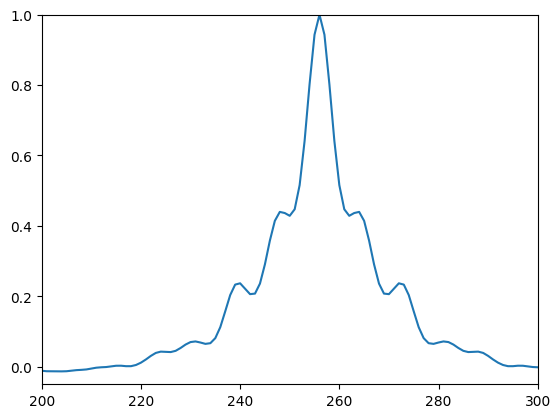

In [49]:
plt.plot(psf['pixels'].data[0,0,256,:])
plt.xlim((200,300)); plt.ylim((-0.05,1))

In [44]:
psf['pixels'].data.sum()

75.47478305784306